In [1]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show, curdoc, push_notebook
from bokeh.models import ColumnDataSource,HoverTool,ColorBar
from bokeh.plotting import figure, show, output_notebook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from bokeh.layouts import layout
from bokeh.layouts import row
from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

output_notebook()


building = np.loadtxt('BUILDING DATA.txt')
locations = pd.read_csv('RFID PATHWAY DATA v2.txt',delimiter='\t')


Loading BokehJS ...

In [2]:
building.shape

(61, 91)

In [3]:
x = []
y = []

for i in range(building.shape[0]):
    for j in range(building.shape[1]):
        if building[i][j]==1:
            x.append(j)
            y.append(building.shape[0]-i)

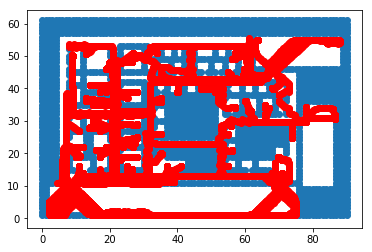

In [4]:
plt.scatter(x,y)
plt.scatter(locations['xcor'],locations['ycor'],c='red')
plt.show()

In [5]:
locations = pd.read_csv('RFID PATHWAY DATA v2.txt',delimiter='\t')


In [6]:
locations.head()

,Time,Person,xcor,ycor
0,1,0,11.0,27.0
1,1,1,70.0,36.0
2,1,2,71.0,14.0
3,1,3,57.0,49.0
4,1,4,9.0,50.0


In [7]:
p = figure(title = "Wholesale Customers Data", tools="hover,lasso_select,pan,wheel_zoom,box_zoom,reset,save")

In [8]:
def update(Time):
    r = p.square(x, y, color='blue', fill_alpha=0.8, size=6)
    locations_wr_time = locations[locations['Time']==Time]
    p.circle(locations_wr_time['xcor'],locations_wr_time['ycor'],color='red',size=6,alpha=0.9)
    push_notebook()

In [9]:
show(p, notebook_handle=True)

W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure(id='ceda761a-7f21-4cfc-87e6-7d5c457b5140', ...)


In [10]:
interact(update,Time=IntSlider(min=1,max=locations.shape[0],step=1,value=1))

<function __main__.update>

In [11]:
p.__dict__

{'_callbacks': {},
 '_document': <bokeh.document.Document at 0x28bb6ce59b0>,
 '_event_callbacks': {},
 '_id': 'ceda761a-7f21-4cfc-87e6-7d5c457b5140',
 '_property_values': {'below': [LinearAxis(id='317e1822-13c3-47c3-b277-f89d42212f7c', ...)],
  'left': [LinearAxis(id='f46e43de-b797-4cce-8ad4-35eca3641d5d', ...)],
  'renderers': [LinearAxis(id='317e1822-13c3-47c3-b277-f89d42212f7c', ...),
   Grid(id='3bc1c9a0-f4ea-4920-be1e-52c132923d3d', ...),
   LinearAxis(id='f46e43de-b797-4cce-8ad4-35eca3641d5d', ...),
   Grid(id='23087e14-805a-4f27-b0a9-e0e7d82a7f8d', ...),
   PolyAnnotation(id='0a929971-18c1-4c3b-aaed-132d0e332979', ...),
   BoxAnnotation(id='c85d6150-2339-4119-ab23-c819f8a75ad7', ...),
   GlyphRenderer(id='e3432d15-5cb8-4d4a-958c-f75dd4e8bea2', ...),
   GlyphRenderer(id='19725de9-fa14-472f-9488-db3bbb771bf9', ...)],
  'title': Title(id='3d43ee4d-9602-414b-b488-32bfc6fa9bd3', ...),
  'toolbar': Toolbar(id='830dead3-40fa-4d2d-a0fe-b0a013b2c02d', ...),
  'x_range': DataRange1d(id='e

In [12]:
p.__dict__['_property_values']

{'below': [LinearAxis(id='317e1822-13c3-47c3-b277-f89d42212f7c', ...)],
 'left': [LinearAxis(id='f46e43de-b797-4cce-8ad4-35eca3641d5d', ...)],
 'renderers': [LinearAxis(id='317e1822-13c3-47c3-b277-f89d42212f7c', ...),
  Grid(id='3bc1c9a0-f4ea-4920-be1e-52c132923d3d', ...),
  LinearAxis(id='f46e43de-b797-4cce-8ad4-35eca3641d5d', ...),
  Grid(id='23087e14-805a-4f27-b0a9-e0e7d82a7f8d', ...),
  PolyAnnotation(id='0a929971-18c1-4c3b-aaed-132d0e332979', ...),
  BoxAnnotation(id='c85d6150-2339-4119-ab23-c819f8a75ad7', ...),
  GlyphRenderer(id='e3432d15-5cb8-4d4a-958c-f75dd4e8bea2', ...),
  GlyphRenderer(id='19725de9-fa14-472f-9488-db3bbb771bf9', ...)],
 'title': Title(id='3d43ee4d-9602-414b-b488-32bfc6fa9bd3', ...),
 'toolbar': Toolbar(id='830dead3-40fa-4d2d-a0fe-b0a013b2c02d', ...),
 'x_range': DataRange1d(id='e9f87159-3269-4657-861b-a32d0671e85e', ...),
 'x_scale': LinearScale(id='c8e1bb5d-9641-4324-8ee4-89e187a81aea', ...),
 'y_range': DataRange1d(id='ce191ce5-2050-4ddd-8835-039791d2ebe0',

In [13]:
#p.__dict__['_property_values']['renderers'] = p.__dict__['_property_values']['renderers'][:6]